# <span style="color:darkblue"> Lecture 21 - Subsetting and Pivoting  </span>

<font size = "5">


<font size = "5">

In the previous class ...

- ... we introduced parsing and
- ... data manipulation with time

In this class we will ...

- Plot multiple series
- Compute growth rates
- Use merge/pivot to change layout of data

# <span style="color:darkblue"> I. Import Libraries and Data </span>

<font size = "5">

Import libraries

In [71]:
# "pandas" processes datasets
# "maplotlib.pyplot" generates graphs

import pandas as pd
import matplotlib.pyplot as plt


<font size = "5">

Import data

In [72]:
financial = pd.read_csv("data_raw/financial.csv")

<font size = "5">

Parse data and sort dataset

In [73]:
financial["date"] = pd.to_datetime(financial["date_str"])
financial = financial.sort_values("date",ascending = True)

In [74]:
financial.dtypes

date_str            object
sp500              float64
djia               float64
date_ex1            object
date_ex2            object
date_ex3            object
date        datetime64[ns]
dtype: object

<font size = "5">

Plot multiple columns

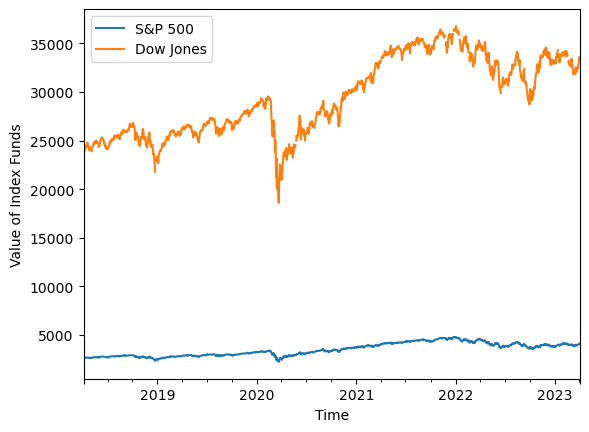

In [75]:
# Enter the x-axis column and y-axis columns you 
# wish to include. Specify the x-axis column with "set_index()"
# This applies to any line plot, with or without dates
# The legend is the box with the name of the lines
# If you drop the ".legend()" command this will assign
# the default column names to the legend.


financial[["date","sp500","djia"]].set_index("date").plot()
plt.xlabel("Time")
plt.ylabel("Value of Index Funds")
plt.legend(["S&P 500","Dow Jones"])


<font size = "5">

Remarks ...

- The S\&P 500 and Dow Jones have different units.
- More sensibile to compare their growth rate!


# <span style="color:darkblue"> II. Time Difference/Growth </span>

<font size = "5">

Change between periods

In [77]:
# First sort columns by date. The second computes the
# differences in "sp500" between each row and the one before it
# By convention, the first row gets a missing value because
# there is nothing to compare. For this to work, it's important
# that the dataset is sorted.


financial["diff_sp500"] = financial["sp500"].diff()
financial["diff_sp500"]

0         NaN
1       18.15
2      -58.37
3        8.69
4       43.71
        ...  
1300    56.54
1301    23.02
1302    58.48
1303    15.20
1304   -23.91
Name: diff_sp500, Length: 1305, dtype: float64

<font size = "5">

Compute lag + percentage growth

In [82]:
# ".shif(1)" compute a new column with the value of "sp500"
# one period before. By convention the first column is assigned
# a missing value
# We can combine ".diff()" and ".shift()" to compute growth rates

financial["lag_sp500"]    = financial["sp500"].shift(1)
print(financial["lag_sp500"].head())
print(financial["sp500"].head())




0        NaN
1    2644.69
2    2662.84
3    2604.47
4    2613.16
Name: lag_sp500, dtype: float64
0    2644.69
1    2662.84
2    2604.47
3    2613.16
4    2656.87
Name: sp500, dtype: float64


In [81]:
financial["growth_sp500"] = financial["diff_sp500"]* 100/financial["lag_sp500"]
financial["growth_sp500"].head()

0         NaN
1    0.686281
2   -2.192021
3    0.333657
4    1.672687
Name: growth_sp500, dtype: float64

<font size = "5">

Time between dates

In [13]:
# In the financial data example, the price of the stock portfolios isn't recorded
# on weekends. Sometimes it's important to account for these differences in the
# legnth between time periods, when accounting for growth rates
# Can compute dt.days, dt.months, dt.year, etc.

financial["diff_date"]  = financial["date"]-financial["date"].shift(1)
financial["count_days"] = financial["diff_date"].dt.days

<font size = "5">

Plot growth

Text(0.5, 1.0, 'Change in the S&P 500 Index')

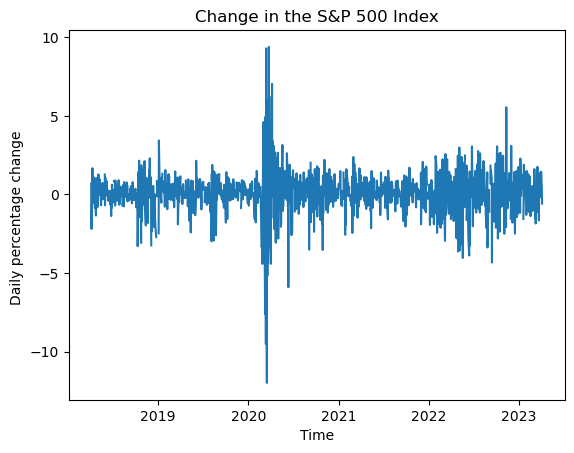

In [14]:
plt.plot("date", "growth_sp500",
          data = financial.sort_values("date",ascending = True))
plt.xlabel("Time")
plt.ylabel("Daily percentage change ")
plt.title("Change in the S&P 500 Index")

<font size = "5" >

Try it yourself!

- Compute a column with the growth of the Dow Jones
- Plot the growth of the S&P 500 and Dow Jones in a <br>
single plot

<Axes: xlabel='date'>

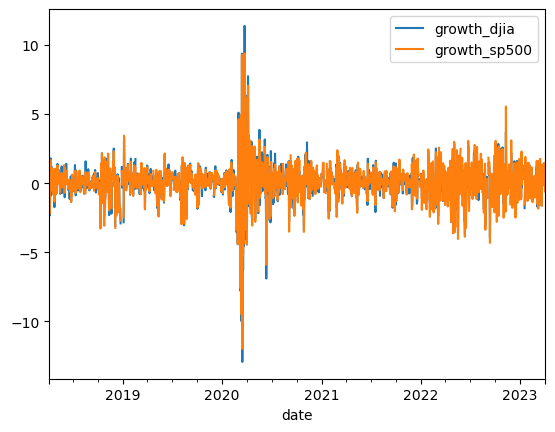

In [15]:
# Write your own code
financial["growth_djia"] = financial["djia"].diff()/financial["djia"].shift(1) * 100
financial[["date", "growth_djia","growth_sp500"]].set_index("date").plot()


ValueError: 'growth_djia' is neither a data key nor a valid format string (two color symbols)

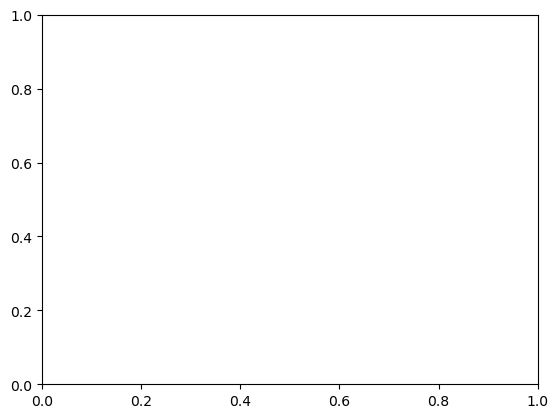

In [83]:

plt.plot("date", "growth_djia",
          data = financial.sort_values("date",ascending = True))
plt.plot("date", "growth_sp500",
          data = financial.sort_values("date",ascending = True))
plt.xlabel("Time")
plt.ylabel("Daily Percentage Change ")
plt.title("Change in the Dow Jones")
plt.legend(["Dow Jones","S&P500"])

# <span style="color:darkblue"> III. Subsetting with time data </span>

<font size = "5" >

Subsetting before/after

In [17]:
# Since the "date" column has a time format, Python
# will interpret "2019-01-01" as a date inside the query command
# Note: remember that you have to use single quotations for ".query()"

subset_before  = financial.query('date <= "2019-01-01" ')
subset_after   = financial.query('date >= "2020-01-01" ')

<font size = "5" >

Subsetting between two dates

In [18]:
# This command applies the function ".between()" to the column

subset_between = financial.query('date.between("2020-03-01","2020-05-01")')

<font size = "5">

Flag observations

In [19]:
financial["bool_period"]  = financial["date"].between("2020-03-01","2020-05-01")
financial["bool_example"] = financial["growth_sp500"] > 5

<font size = "5">

Plot results

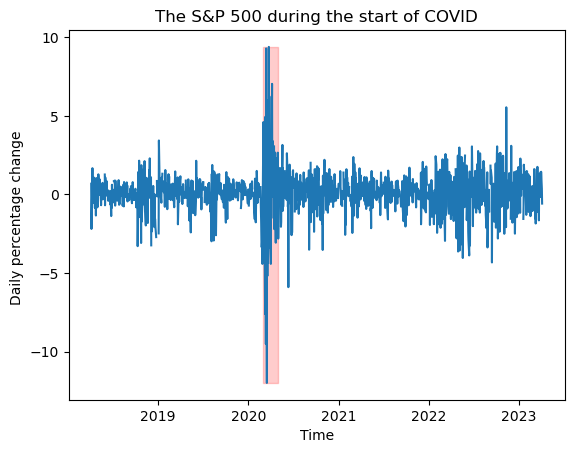

In [20]:
# Create a line plot
plt.plot("date", "growth_sp500", data = financial)
plt.xlabel("Time")
plt.ylabel("Daily percentage change ")
plt.title("The S&P 500 during the start of COVID")

# Add a shaded region wth a rectangle
# "x" is the x-coordinates, "y1" and "y2" are the lower
# and upper bounds of the rectangle. We can set this
# to be the minimum and meximum of the outcome.
# we use "where" to test a logical condition

vec_y = financial["growth_sp500"]
plt.fill_between(x= financial["date"],
                 y1 = vec_y.min(),
                 y2 = vec_y.max(),
                 where = financial["bool_period"],
                 alpha = 0.2,color = "red")

plt.show()

<font size = "5">

Try it yourself!

- Generate a plot of the daily growth of the Dow Jones 
- Highlight regions where there was growth higher than 4\% <br>
or below -4\%

In [22]:
financial["bool_djia"] = (financial["growth_djia"] > 4) | (financial["growth_djia"] < -4)

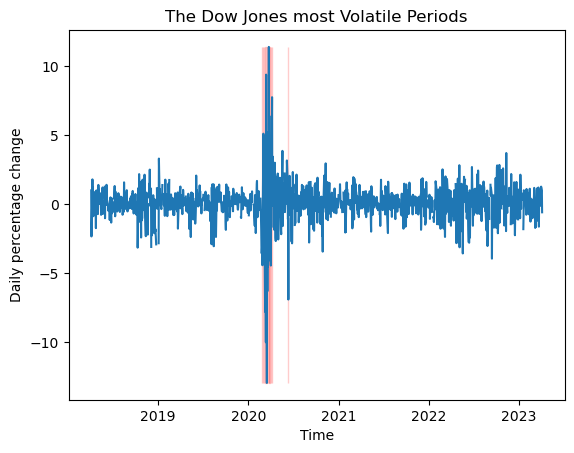

In [24]:
# Write your own code
plt.plot('date','growth_djia', data=financial)
plt.xlabel('Time')
plt.ylabel("Daily percentage change")
plt.title("The Dow Jones most Volatile Periods")

vec_y = financial["growth_djia"]

plt.fill_between(x=financial["date"],
                 y1 = vec_y.min(),
                 y2 = vec_y.max(),
                 where=financial["bool_djia"],
                 alpha = 0.2, color = "red")


# <span style="color:darkblue"> IV. Wide and Long Format </span>

<font size = "5">

Data can come in a wide variety of formats

- Few rows, multiple columns (wide)
- Stacked rows, few columns (long)
- The **information** is the same!

<font size = "5">

Wide to long

$\quad$ <img src="figures/melt_fig.png" alt="drawing" width="550"/>

In [39]:

financial_long = pd.melt(financial,
                         var_name   = "portfolio_type",
                         value_name = "portfolio_value",
                         id_vars='date',
                         value_vars=['sp500','djia'])
# creating subset for comparison between melt function and the other variables 
financial_subset = financial[["date","sp500","djia"]]
print(financial_subset.head())
print(financial_long.head())


        date    sp500      djia
0 2018-04-04  2644.69  24264.30
1 2018-04-05  2662.84  24505.22
2 2018-04-06  2604.47  23932.76
3 2018-04-09  2613.16  23979.10
4 2018-04-10  2656.87  24408.00
        date portfolio_type  portfolio_value
0 2018-04-04          sp500          2644.69
1 2018-04-05          sp500          2662.84
2 2018-04-06          sp500          2604.47
3 2018-04-09          sp500          2613.16
4 2018-04-10          sp500          2656.87


<font size = "5">

Long to wide

$\quad$ <img src="figures/pivot_fig.png" alt="drawing" width="550"/>

In [44]:
financial_wide = (pd.pivot(financial_long,
                           index = 'date',
                           columns = 'portfolio_type',
                           values =  'portfolio_value'))


print(financial_wide.head())
# If you also want the index to be part of the dataset add
# ".reset_index()" to the end of the previous command

portfolio_type      djia    sp500
date                             
2018-04-04      24264.30  2644.69
2018-04-05      24505.22  2662.84
2018-04-06      23932.76  2604.47
2018-04-09      23979.10  2613.16
2018-04-10      24408.00  2656.87


<font size = "5">

Try it yourself!

- Convert the "growth_sp500" and <br>
"growth_djia" to long format

In [70]:
# Write your own code
# Note: You can give any custom value to "var_name" or "value_name"

financial[["growth_sp500","growth_djia"]].head()
growth_long = pd.melt(financial,
                      var_name = "portfolio_type",
                      value_name="portfolio_value",
                      id_vars='date',
                      value_vars=["sp500","djia"])
print(growth_long.head())


        date portfolio_type  portfolio_value
0 2018-04-04          sp500          2644.69
1 2018-04-05          sp500          2662.84
2 2018-04-06          sp500          2604.47
3 2018-04-09          sp500          2613.16
4 2018-04-10          sp500          2656.87
